# Maschinelles Lernen - Binäre Klassifikation

In diesem JN werden Fragestellungen der binären Klassifikation behandelt.
Eine binärer Klassifikation ist eine oftmals wiederkehrende Aufgabe:
- Ist in einem Bild ein Hund zu sehen oder nicht.
- Ist eine Person kreditwürdig oder nicht.
- Trennung bei physikalischen Experimenten zwischen Signal (*signal*) und Hintergrund (*background*)
- Ist ein Exoplant potenziell bewohnbar (*habitable*) oder nicht.

Die letzte Fragestellung wird hier etwas untersucht, so wie es auch bei Vivianana Acquaviva [Acq23] durchgeführt wird.
Dazu werden zuerst die Daten, die für die Untersuchung herangezogen werden betrachtet, um mit den Dtaen vertrauter zu werden.
Anschließend werden zwei ALgorithmen des ML vorgestellt: **Entscheidungsbaum** (*Decision Tree*, DT) und 
**k_Nächste-Nachbarn** (*k-Nearest Neighbour*, kNN) mit denen die Modelle trainiert werden.
Dann wird untersucht, wie wir das erzielte Ergebnis bewerten können, um damit zu untersuchen, welcher Algorithmus besser ist.
Da die Traingsdaten nur einen kleinen Umfang haben, wird das Verfahren **Cross Validation** vorgestellt, so dass 
die gesamte Lernmenge als Trainings- und Testdaten zur Verfügung steht.
Dabei werden die Modelle auf den gesamten Datenumfang, also nicht nur auf die Lernmenge angewendet.
Zum Abschluss werden die Ergebnisse ausgewertet und untersucht, welche Möglichkeiten zur Verbesserung es gibt.

Abschließend wird noch ein Ausblick auf die Multi Klassifizierung durchgeführt, denn für manche Fragestellung gibt es nicht eine binäre Entscheidung,
sondenr mehr als zwei Möglichkeiten:
- Irisblüten: Selektion zwischen drei Arten
- Erkenn von handschriftlichen Ziffern - Selektion zwischen zehn Ergebnissen.

## Problemstellung und Daten

Daten sind die Basis für die Arbeit im Data Science. Viviana Acquavia schreibt dazu (siehe [Acq23], Abschnitt 2.1) als von ihr aufgestellte *goldene Regel*: "know your data"!
Daher ist es wichtig, die Daten zu betrachten. Dabei sollen mindestens die nachfolgenden Dinge unternommen werden:
- Den Umfang der Daten prüfen, die Anzahl der Instanzen und die Anzahl der Eigenschaften. Gibt es ausreichend viele Datensätze für die Bearbeitung?
- Überprüfen, ob die Daten vollständig sind oder ob es in den Datensätzen fehlende Daten gibt. Wie wird mit mit fehlenden Daten umgegangen?
- Müssen die Daten eventuell normalisiert werden? Gibt es merkwürdige Verteilung der Daten? Wie wird mit Ausreißern (*outlier*) der Daten umgegangen?
- Sind bei einem Klassifizierungsproblem in allen Klassen ausreichend viele Daten vorhanden? 

Daher ist es nicht ratsam, die Algorithmene einfach nur anzuwenden, ohne dass die Daten verstanden werden. 
Die Ergebnisse der Analyse müssen geprüft und interpretiert werden. 
Es ist zu prüfen, ob das Ergebnis mit der Intuition übereinstimmt. Wenn nicht, dann ist zu klären, woher die Diskrepanz herrührt.

### Habitable Planeten

Vivana Acuavia wählt als ersten Beispiel einen Datensatz von 18 Exoplanten, bei denen verschiedene Merkmale bekannt sind 
und die Farge besteht, ob sie bewohnbar (*habitable*) sind. 
Die Daten hat sie von der Quelle http://phl.upr.edu/projects/habitable-exoplanets-catalog, in der inzwischen einige Tausende Exoplaneten aufgeführt sind. 
Sie hat 18 Planten aus dieser Liste ausgewählt. Diese Beispiele werden auch im nachfolgenden betrachtet und untersucht. 
Dabei werden verschiedene 
Modelle angewendet und dabei verschiedene Sachverhalte erläutert und beispielhaft demonstriert.

Die Beispieldaten beinhalten die folgenden Merkmale (*features*) und Ziele (*targets*):
- Name des Exoplanten: Dies ist nur für die Identifikation notwendig.
- Masse des Sterns (*stellar mass*), um den der Exoplant kreist, ausgedrückt in Sonnenmassen.
- Umlaufdauer (*orbital period*) des Exoplanten um den Stern in Tagen. 
- Distanz (distance) des Exoplanten von Stern in Astronomischen Einheiten (AU).
- Bewohnbar (*habitable*)? Eine Einschätzung, ob der Plant bewohnbar ist (1 = bewohnbar, 0 = nicht bewohnbar).

Hinweis: In der Quelle der Daten ist die Eigenschaft bewohnbar noch weiter differenziert. Darauf wird hier nicht genauer eingegangen. 
Wenn mit dem großen Datensatz aus der Quelle gearbeitet wird, dann ist zu klären, wie damit umgegangen wird. 
Daher ist es wichtig, die Daten zu kennen und vor den Auswertung zu betrachten.

In [1]:
# --- read the data
import pandas as pd
filename = 'HabitablePlanets_LearningSet.csv'
learning_set = pd.read_csv (filename, sep=',')
learning_set = learning_set.drop (learning_set.columns [0], axis=1)
print (learning_set)

# --- print the data of one exoplant
def print_planet (nr, planet):
    print (f"{nr:4d}  {planet [0]:20s} {planet [1]:5.2f}  {planet [2]:12.6f} {planet [3]:10.6f} {planet [4]:6d}")

# --- print a table with the complete lerarning set
def print_planets (planets):
    print ("======================================================================")
    print ("  nr  name             star mass        period   distance    habitable")
    print ("                      (sun mass)         (day)       (AU)    (0=No)")
    print ("======================================================================")
    nr = 0
    for planet in planets:
        print_planet (nr, planet)
        nr = nr + 1
    print ("======================================================================")
 
#print_planets (learning_set.values)

                P_NAME  S_MASS     P_PERIOD  P_DISTANCE  P_HABITABLE
0         Kepler-736 b    0.86     3.601472    0.043718            0
1         Kepler-636 b    0.85    16.080661    0.118082            0
2         Kepler-887 c    1.19     7.638460    0.080420            0
3         Kepler-442 b    0.61   112.305300    0.409327            1
4         Kepler-772 b    0.98    12.992073    0.107408            0
5   Teegarden's Star b    0.09     4.910000    0.025200            1
6             K2-116 b    0.69     4.655411    0.048086            0
7            GJ 1061 c    0.12     6.689000    0.035000            1
8           HD 68402 b    1.12  1103.000000    2.180981            0
9        Kepler-1544 b    0.81   168.811170    0.557107            1
10        Kepler-296 e    0.50    34.142110    0.178202            1
11        Kepler-705 b    0.53    56.056054    0.231926            1
12        Kepler-445 c    0.18     4.871229    0.031746            0
13         HD 104067 b    0.62    

Bei der Betrachtung der Daten fällt auf, dass der Plant mit der Nummer 8 (HD 68402 b) ein Ausreißer ist.
Die Periodendauer und der Abstand zur Sonne ist deutlicher größer als bei den anderen Planent.
In Anbetracht der Kepler'schen Planentengesetz ist das jedoch nicht unwahrscheinlich.

Es gibt bei den Beispielen acht bewohnbare Planeten und zehn unbewohnbare Planten. 
Damit ist der Datensatz bezüglich der Eigenschaft bewohnbar?" ausgeglichen.
Im großen Datensatz ist der Anteil der bewohnbaren Planten deutlich geringer.

Eine wichtige Eigenschaft für die Frage, ob ein Planet bewohnbar ist oder nicht, ist die Temperatur auf der Oberfläche.
Diese Eigenschaft ist nicht im Datensatz direkt enthalten. 
Über die Eigenschaften Sternenmasse und Distanz ist die Temperatur jedoch indirekt berücksichtigt, 
denn Sternenmasse und Distanz sind wichtige Parameter, welche die Temperatur stark beeinflussen.

### Aufspaltung in Trainings- und Testdaten

Gemäß den Ausführungen bei Viviana Acquaviva werden die ersten 13 Planenten (also die Nummern 0 bis 12) als Trainingsdaten (*training set*) 
und die letzten fünf Planeten (Nummern 13 bis 17) als Testdaten (*test set*) verwendet. 

Die Daten haben drei Input-Daten.
- Masse des Sterns in Sonnenmassen (mass), 
- Dauer eines Umlaufes in Tagen (period) und 
- Entfernung des Planten von der Sonne in Astronomischen Einheten (AU) (distance).

Da eine 3-dimensionale Darstellung schwierig ist, werden im nachfolgenden nur zwei der Eigenschaften zur Darstellung und zur Bearbeitung verwendet: Sternenmasse (mass) und Umlaufdauer (period).

Note the use of ".iloc" (integer location) to access indices in data frames.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# --- split into training set / test set
# use of .iloc (integer location): purely integer-location based indexing for selection by position
training_set = learning_set.iloc [:13,:]
test_set = learning_set.iloc [13:,:]

# --- split in features and label
X_train = training_set [['S_MASS', 'P_PERIOD']].to_numpy ()
X_test = test_set [['S_MASS', 'P_PERIOD']].to_numpy ()
#X_train = training_set.drop (['P_NAME', 'P_HABITABLE', 'P_DISTANCE'],axis=1) 
#X_test = test_set.drop (['P_NAME', 'P_HABITABLE', 'P_DISTANCE'],axis=1) 
y_train = training_set.P_HABITABLE.to_numpy ()
y_test = test_set.P_HABITABLE.to_numpy () 

Die Daten werden grafisch dargestellt. Da die Werte auf der $y$-Achse sehr weit gestreut sind, wir ein logarithmische Skalierung gewählt.

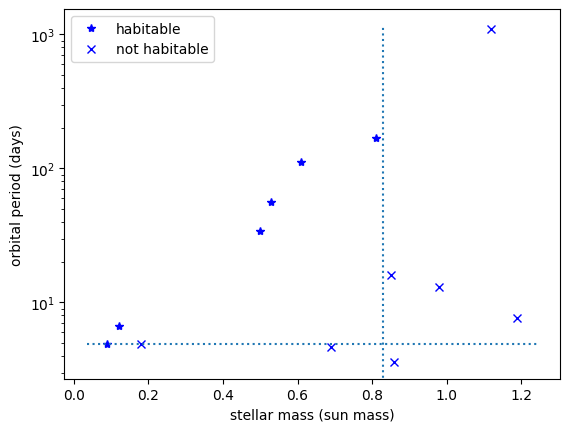

In [3]:
# --- select habitable / not habitable
pattern_train_habitable = np.where (y_train == 1, True, False)
pattern_train_not_habitable = np.where (y_train == 0, True, False)

X_train_habitable = X_train [pattern_train_habitable]
X_train_not_habitable = X_train [pattern_train_not_habitable]
y_train_habitable = y_train [pattern_train_habitable]
y_train_not_habitable = y_train [pattern_train_not_habitable]

plt.plot (X_train_habitable [:,0], X_train_habitable [:,1], 'b*', label = 'habitable')
plt.plot (X_train_not_habitable [:,0], X_train_not_habitable [:,1], 'bx', label = 'not habitable')
xmin, xmax = plt.xlim ()
plt.hlines (4.93, xmin, xmax,linestyles = 'dotted')
ymin, ymax = plt.ylim ()
plt.vlines (0.83, ymin, ymax,linestyles = 'dotted')
plt.xlabel ('stellar mass (sun mass)')
plt.ylabel ('orbital period (days)')
plt.yscale ("log")
plt.legend ()
plt.show ()

## Algorithmus: Entscheidungsbaum (*Decision Tree*, DT) - per Hand


Bei einem Entscheidungsbaum werden an Hand eines Kriteriums Schnitte durchgeführt. Dadurch wird der Bereich in zwei Teile zerlegt.
Es ergibt sich die Frage, wo der Schnitt geeignet gewählt werden kann. Ziel ist es, dass am Schluss reine Bereiche entstehen,
bei der in jedem Bereich nur eine Klasse vertreten ist. In den einzelnen Bereichen soll es keine Vermischung geben.

Zur Bemessung der Vermischung von Daten wird oftmals der **Gini Unreinheit** (*Gini impurity*) herangezogen.
Für jede Klasse $i$ sei $n(i)$ die Anzahl der Elemente der Klasse. Somit ist $N = \sum_i n(i)$ die Gesamtanzahl der Objekte.
Dann sei $f(i) = n(i) / N$ der Anteil der Elemente der Klasse $i$ in der Gesamtmenge.
Die Gini Unreinheit berechnet sich dann durch
$$ Gini = 1 - \sum_i f(i)^2 $$
In einer Menge mit zwei Klassen ist der Wert zwischen $0.0$ und $0.5$. Bei einem Wert von $0.0$ besteht die Menge nur aus Elementen einer Klasse.
Bei einem Wert von $0.5$ ist die Menge maximal durchmischt

In den Trainingsdaten sind insgesamt 13 Daten enthalten. Sieben habitable Planeten und sechs nicht habitable Planeten. 
Für die gegebene Trainingsmenge ist $Gini = 1 - (7/13)^2 - (6/13)^2 = 0.497$

Wenn die Trainingsdaten betrachtet werden, dann gibt es zwei Schnitte, welche die Menge so spalten, so dass ein Teilbereich
rein ist. 
- ist die Sternenmasse größer als $0.83$ (Sonnenmassen), dann sind alle Planenten nicht habitabel
- ist die Periodendauer kleiner als $4.93$ (Tage), dann sind alle Planenten nicht habitabel

Beide Linien sind in der obigen Zeichnung eingetragen. Welcher Schnitt sollte zuerst durchgeführt werden?

Der Wert *Gini Unreinheit* ist nach dem italienischen Statistiker Corrado Gini (https://de.wikipedia.org/wiki/Corrado_Gini) benannt.
Er darf nicht mit dem Gini-Koeffizienten verwechselt werden!

In [4]:
# --- calculate gini impurity for 2 classes
def gini (n1, n2):
    n = n1 + n2
    return 1 - (n1 / n) **2 - (n2 / n) ** 2

print (gini (2,0))
print (gini (1,1))
print (gini (7, 6))

0.0
0.5
0.49704142011834324


Wird der Schnitt bezüglich der Periodendauer durchgeführt. Dann ist sind im oberen Bereich 6 habitable und 4 nicht-habitable Planeten.
Im unteren Bereich sind 0 habitable und 3 nicht-habitable Planten. Der untere Bereich ist damit rein. Damit ergibt sich folgender gewichtete Wert:

In [5]:
gini_slice_period = (10 / 13) * gini (6, 4) + (3 / 13) * gini (0, 3)
print (gini_slice_period)

0.36923076923076925


Wird der Schnitt bezüglich der Sternenmasse durchgeführt. Dann ist sind im linkenn Bereich 6 habitable und 2 nicht-habitable Planeten.
Im rechten Bereich sind 0 habitable und 5 nicht-habitable Planten. Der rechte Bereich ist damit rein. Damit ergibt sich folgender gewichtete Wert:

In [6]:
gini_slice_mass = (8 / 13) * gini (6, 2) + (5 / 13) * gini (0, 5)
print (gini_slice_mass)

0.23076923076923078


Damit zeigt sich, dass der Schnitt nach der Sternenmasse die Gini Unreinheit deutlicher reduziert als der Schnitt nach der Periodendauer.
Daher wird zuerst der Schnitt nach der Sternebmasse durchgeführt. Dann ist eine Teilmenge rein, die andere noch nicht.
Wenn bei der unreinen Menge dann der Schnitt nach der Periodendauer durchgeführt wird, dann ist die gesamte Trainingsmenge
in drei reine Bereiche aufgeteilt. Eine weitere Zerlegung ist nicht notwenidig.

Aber was bedeutet das nur für die Testdaten? Passen diese auch zu dieser Aufteilung?

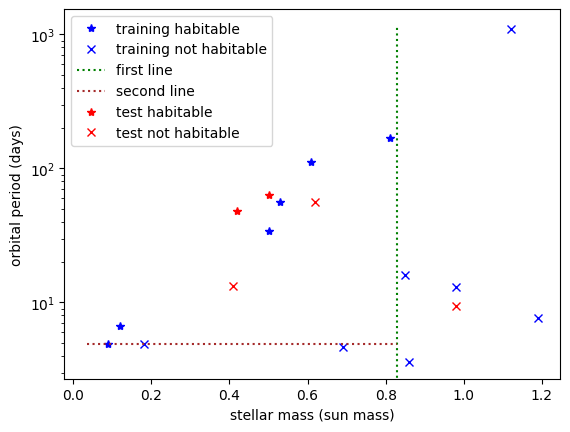

In [7]:
pattern_test_habitable = np.where (y_test == 1, True, False)
pattern_test_not_habitable = np.where (y_test == 0, True, False)
X_test_habitable = X_test [pattern_test_habitable]
X_test_not_habitable = X_test [pattern_test_not_habitable]

plt.plot (X_train_habitable [:,0], X_train_habitable [:,1], 'b*', label = 'training habitable')
plt.plot (X_train_not_habitable [:,0], X_train_not_habitable [:,1], 'bx', label = 'training not habitable')
ymin, ymax = plt.ylim ()
plt.vlines (0.83, ymin, ymax, color = 'green', linestyles = 'dotted', label = 'first line')
xmin, xmax = plt.xlim ()
plt.hlines (4.93, xmin, 0.83, color = 'brown', linestyles = 'dotted', label = 'second line')
plt.plot (X_test_habitable [:,0], X_test_habitable [:,1], 'r*', label = 'test habitable')
plt.plot (X_test_not_habitable [:,0], X_test_not_habitable [:,1], 'rx', label = 'test not habitable')
plt.xlabel ('stellar mass (sun mass)')
plt.ylabel ('orbital period (days)')
plt.yscale ("log")
plt.legend ()
plt.show ()

Von den fünf Testdaten  sind drei richtig klassifiziert, zwei jedoch nicht!

## Decision Tree (DT) mit *scikit-learn*

Die Berechnung per Hand kann sehr schnell aufwändig werden. Zudem ist die Dimension der Daten nicht nur 2. 
Bereits im obigen Beispiel wurde eine Dimension reduziert, damit die Daten grafisch anschaulich dargestellt werden können.

Das Paket *sklearn* (*scikit-learn*) bietet jedoch ein entsprechendes Modell.

Hinweis: Es werden einige zufällige Permutation bei jedem Splitt durchgeführt. Daher können die Ergebnisse je nach Durchführung variieren.
Daher für den Zufallsgenerator einen *ssed* definieren.

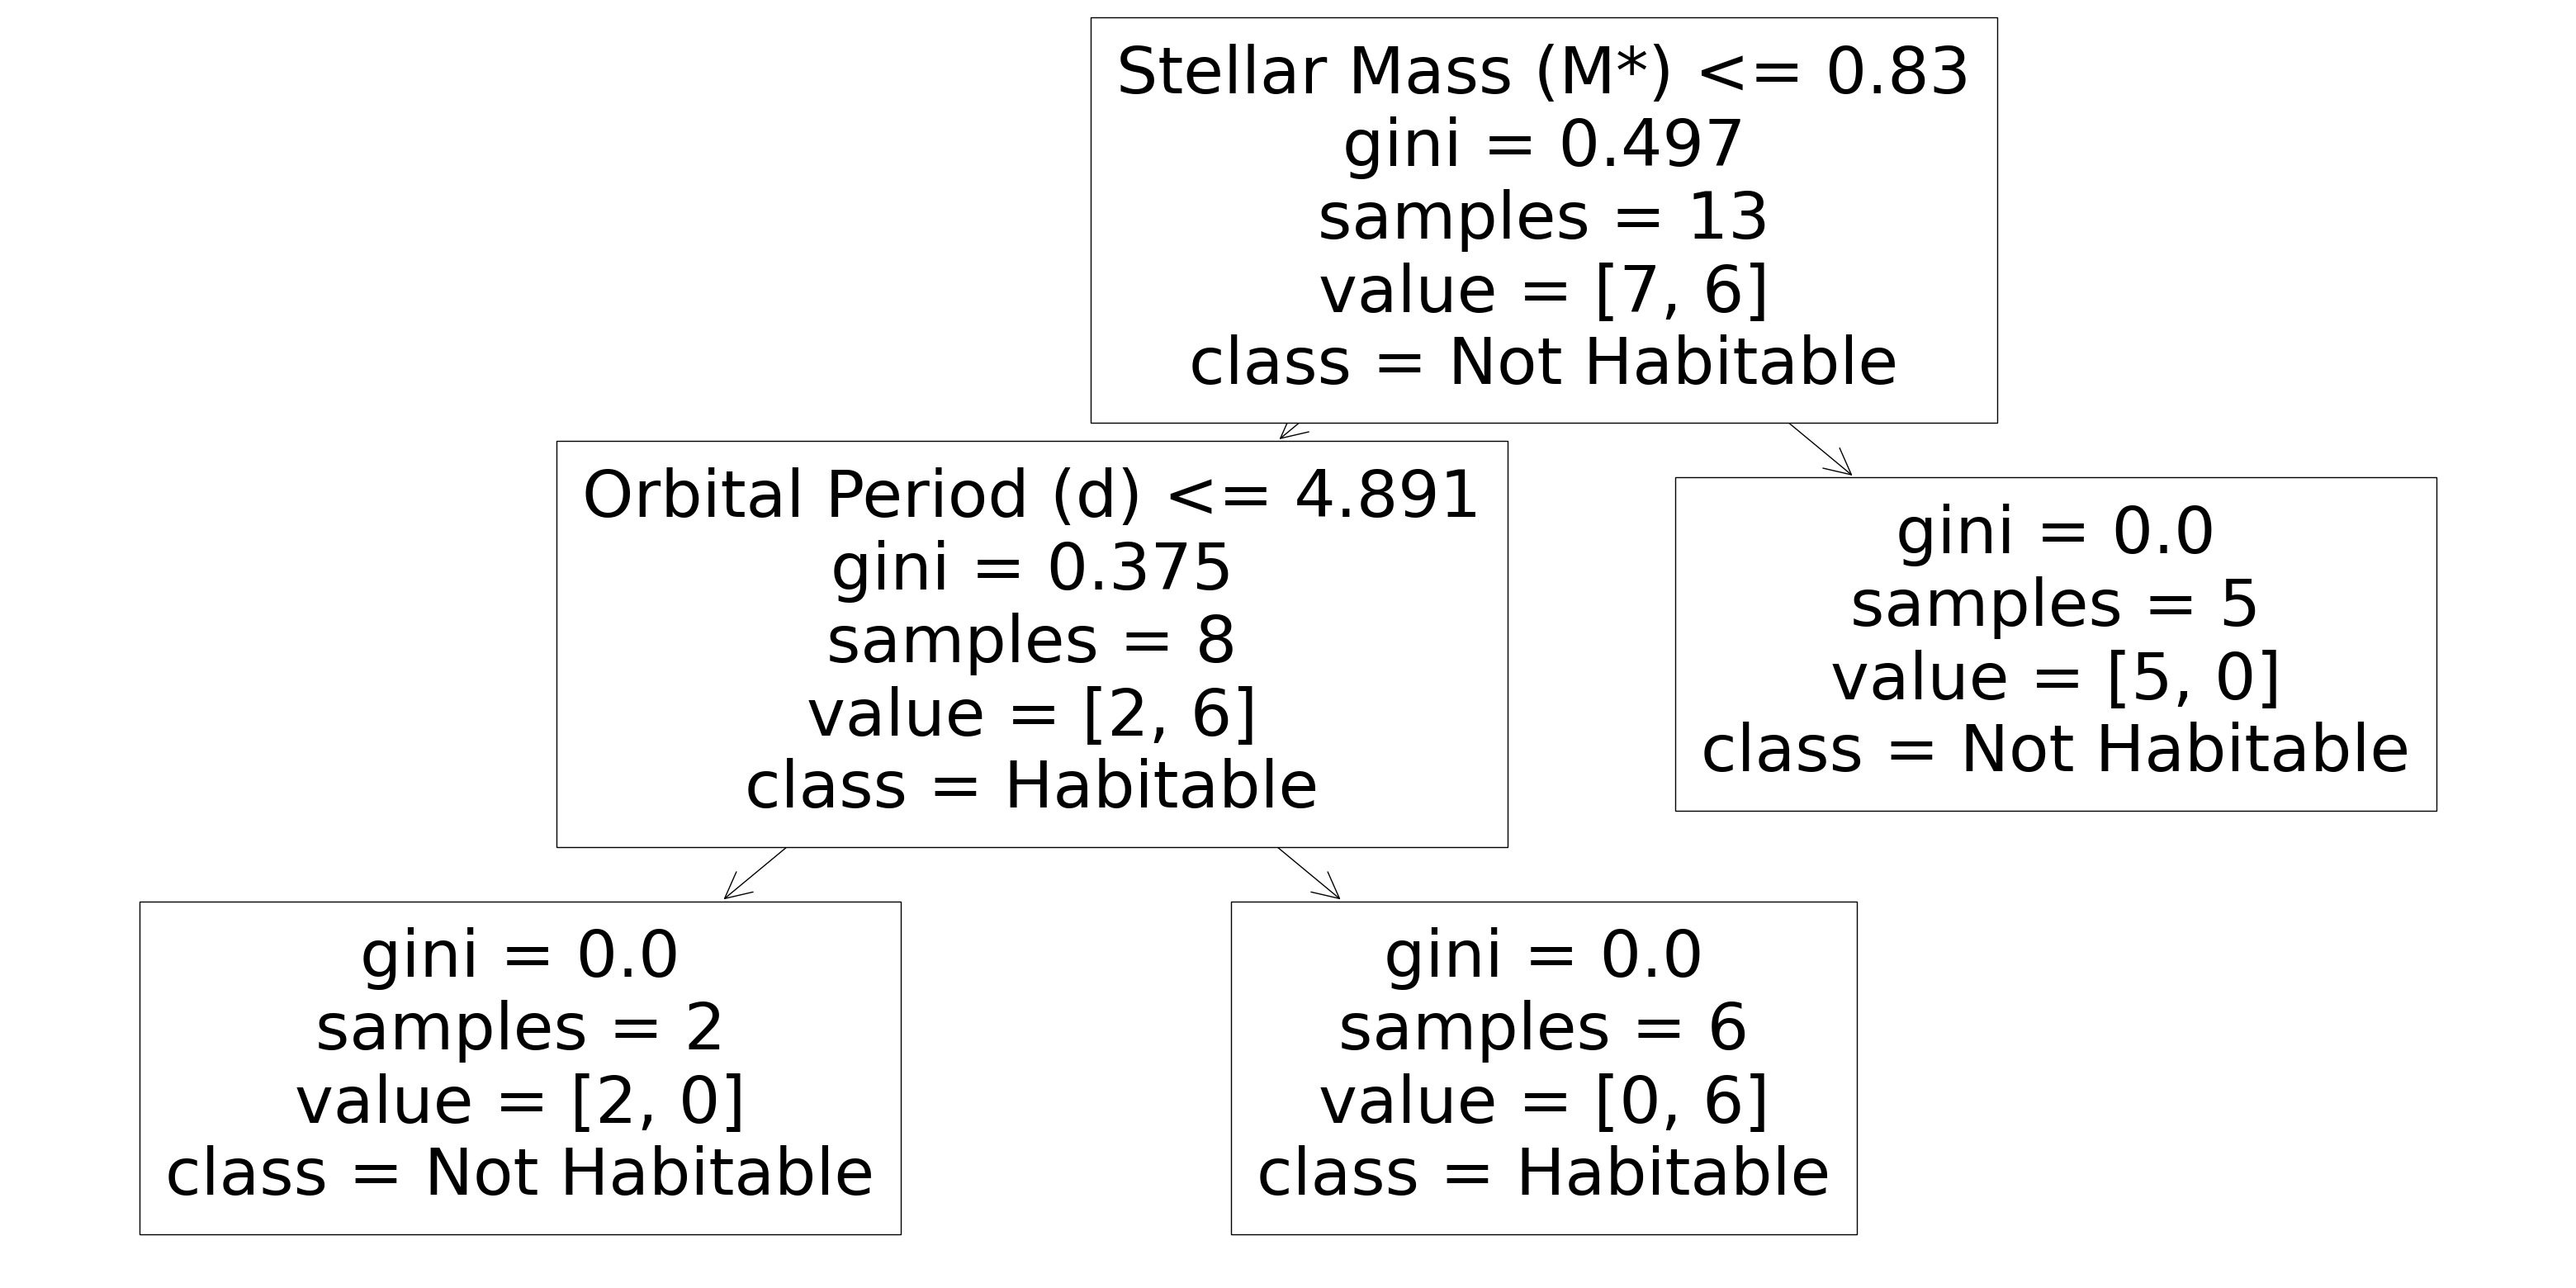

In [8]:
# --- import 
from sklearn.tree import DecisionTreeClassifier

# --- define the model and some parameters
DT_model = DecisionTreeClassifier(random_state = 2024) #

# --- redefine hte training set und test set, use all three festures
X_train = training_set.drop (['P_NAME', 'P_HABITABLE'],axis=1) 
X_test = test_set.drop (['P_NAME', 'P_HABITABLE'],axis=1) 
y_train = training_set.P_HABITABLE.to_numpy ()
y_test = test_set.P_HABITABLE.to_numpy ()

# --- train the model
DT_model.fit(X_train, y_train) 

# --- visualize decision tree
from sklearn import tree
plt.figure (figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree (DT_model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])
plt.show()

Es ist ein sehr kleiner, kompakter Entscheidungsbaum. Mit nur zwei Entscheidungen wurde die Trainingsmenge in reine Bereiche aufgeteilt.
Welches Ergebnis ergibt sich für die Testmenge?

Auf jeden Fall ist gemäß diesem Entscheidungsbaum die Erde voraussichtlich nicht bewohnbar!

In [9]:
y_pred = DT_model.predict(X_test)
y_diff = np.absolute (y_pred - y_test)
n_planets = y_diff.size
n_correct = n_planets - np.count_nonzero (y_diff)
print (f" {n_correct} of {n_planets} are correctly predicted, {n_correct * 100.0 / n_planets:5.1f} %")

 3 of 5 are correctly predicted,  60.0 %


## Abhängigkeit von der Trainingsmenge
Das gegebene Beispiel ist sehr klein. Die Lernmenge umfasst nur 18 Elemente. Davon wurden (die ersten) 13 Elemente als Trainingsmenge ausgewählt.
Jetzt werden die letzten 13 Elemente als Trainingsmenge ausgewählt.  Wie verändert sich dadurch der Entscheidungsbaum.

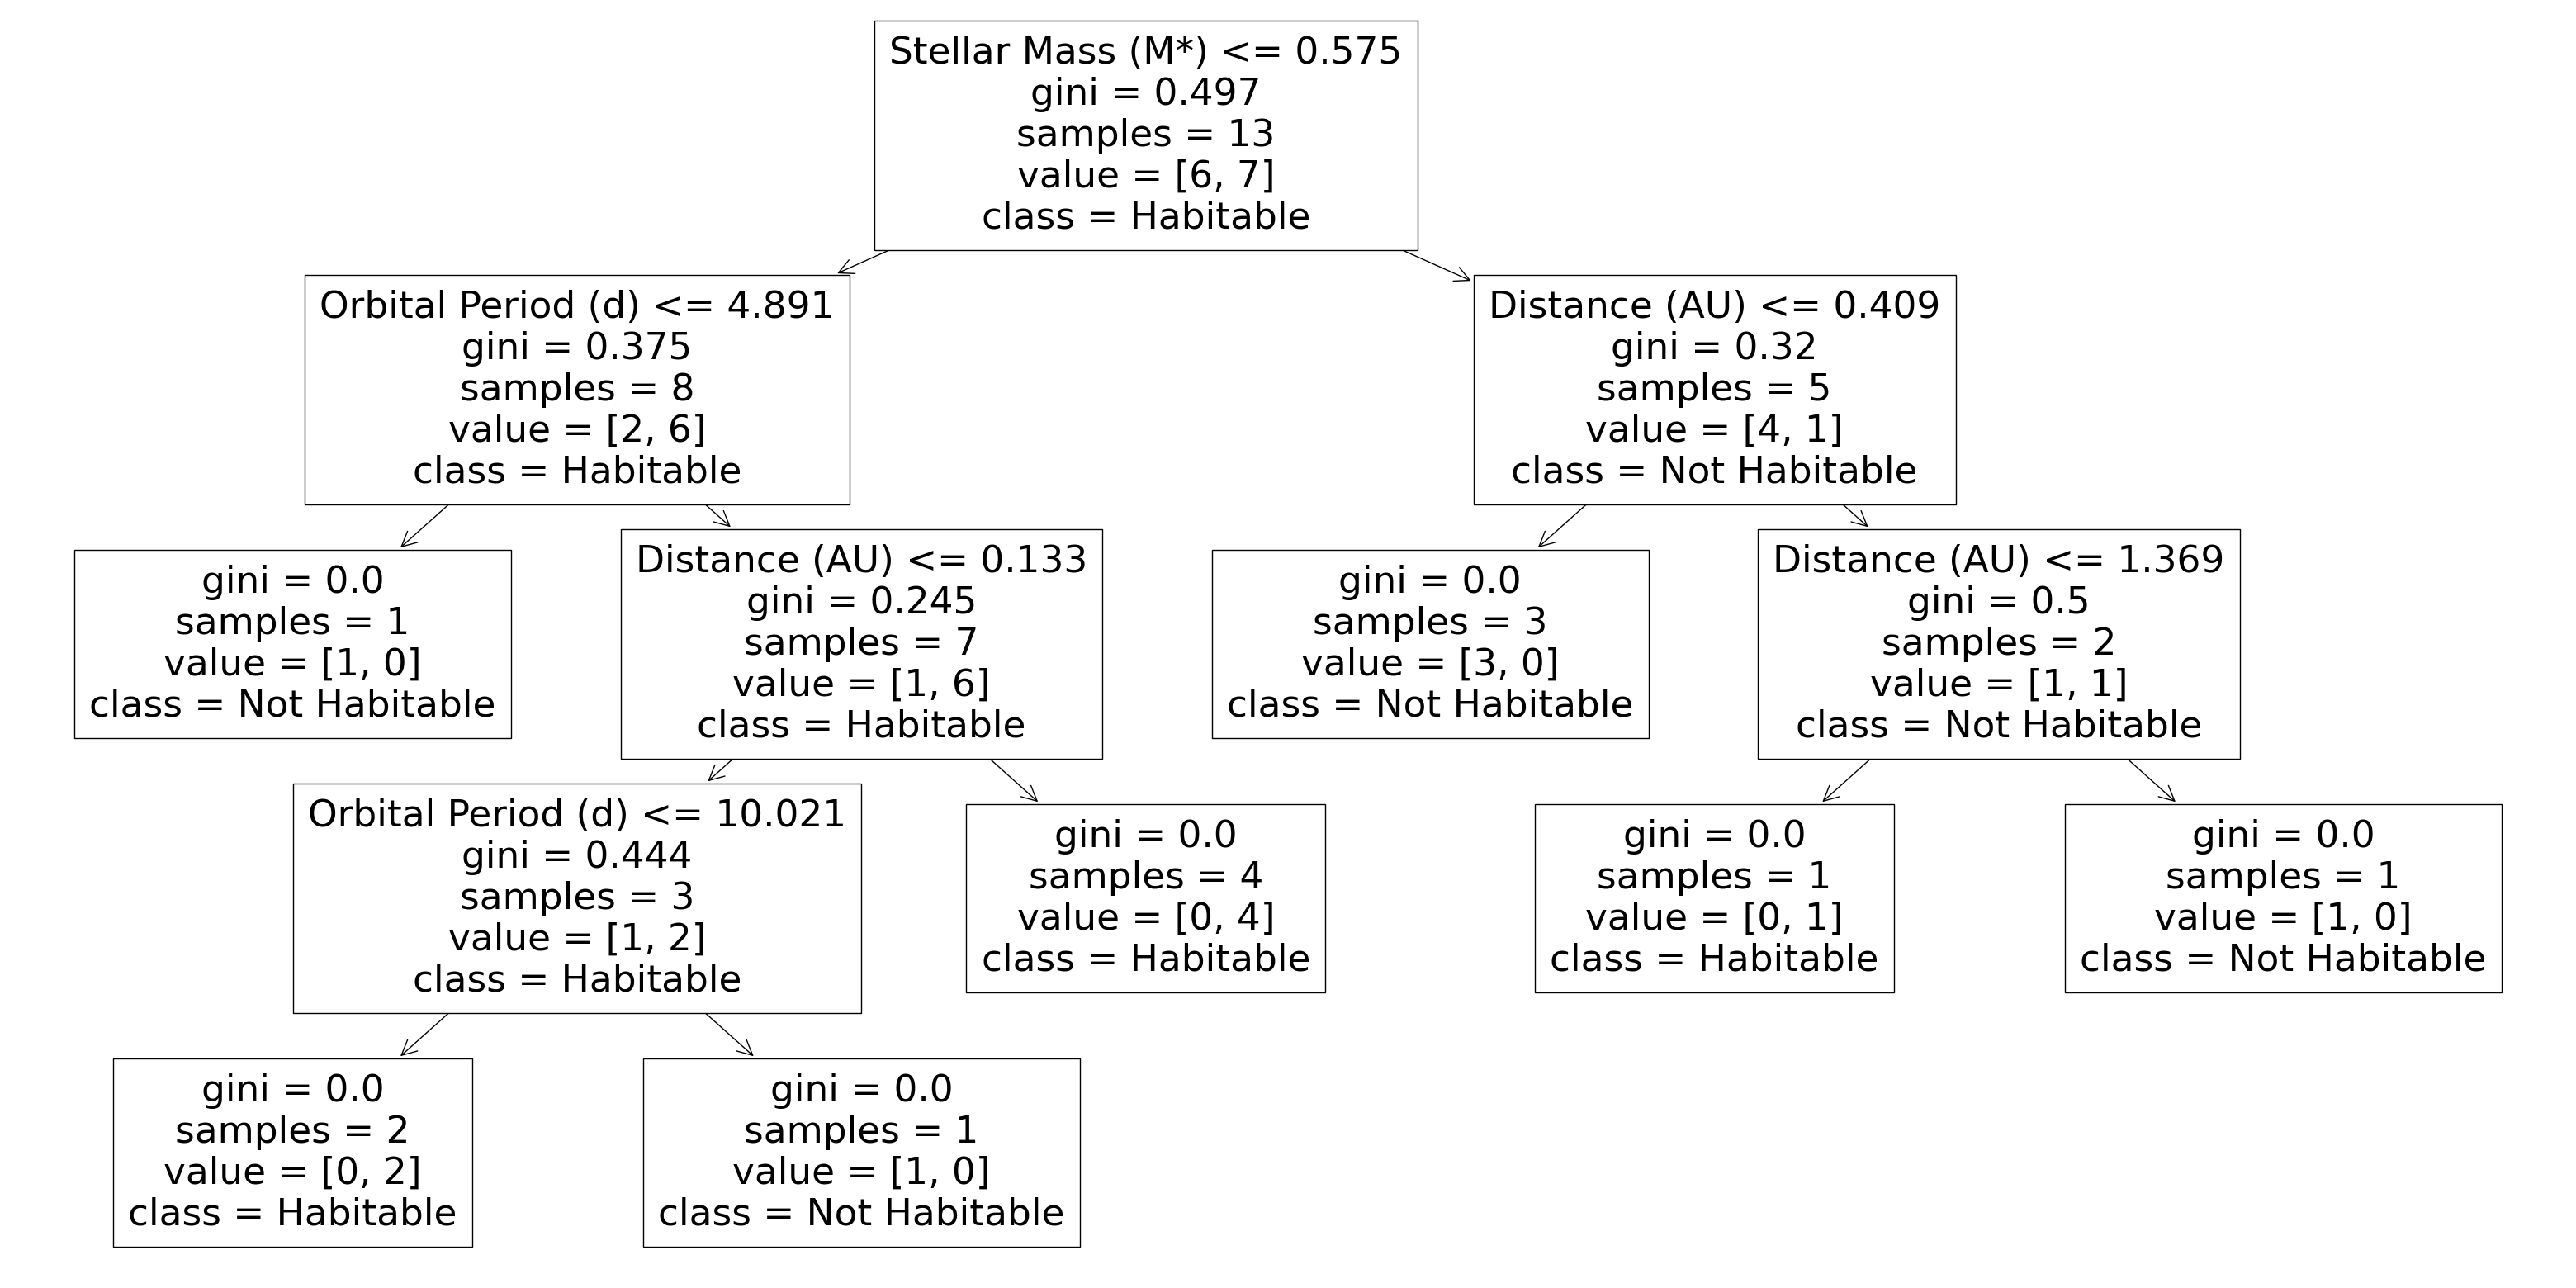

In [10]:
# --- split into training set / test set
training_set2 = learning_set.iloc [5:,:]
test_set2 = learning_set.iloc [:5,:]

# --- split in features and label
X2_train = training_set2.drop (['P_NAME', 'P_HABITABLE'],axis=1) 
X2_test = test_set2.drop (['P_NAME', 'P_HABITABLE'],axis=1) 
y2_train = training_set2.P_HABITABLE.to_numpy ()
y2_test = test_set2.P_HABITABLE.to_numpy () 

# --- define the model and some parameters
DT2_model = DecisionTreeClassifier(random_state = 2024) #

# --- train the model
DT2_model.fit(X2_train, y2_train) 

# --- visualize decision tree
plt.figure (figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree (DT2_model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])
plt.show()

Der Entscheidungsbaum sieht komplett anders aus. Er ist tiefer und hat somit mehr Entscheidungen.
Welches Ergebnis ergibt sich für die Testmenge?

Auf jeden Fall ist gemäß diesem Entscheidungsbaum die Erde voraussichtlich bewohnbar!

In [11]:
y2_pred = DT2_model.predict(X2_test)
y2_diff = np.absolute (y2_pred - y2_test)
n2_planets = y2_diff.size
n2_correct = n2_planets - np.count_nonzero (y2_diff)
print (f" {n2_correct} of {n2_planets} are correctly predicted, {n2_correct * 100.0 / n2_planets:5.1f} %")

 5 of 5 are correctly predicted, 100.0 %


Es ergibt sich hier eine 100%-tige Korrektheit. 
Doch ist damit dieser Entscheidungsbaum besser?
Das kann hier nicht einfach gesagt werden. Die Trainingsmenge ist sehr klein. 
Daher kann als wichtige Aussage mitgenommen werden: **die unterschiedliche Aufteilung in Traingsmenge und Testmenge, 
kann einen entscheidenen Einfluss auf das Modell und auf den Testfehler haben**.

DIe Bewertung von Modellen muss genauer betrachtet werden.
Die (einheitliche) Bewertung ist wichtig, um dann verschiedene Modelle miteinander vergleichen zu können.

### Variation des Modells: maximale Tiefe 2
Das Modell hat einige Parameter, die eingestellt werden können. Zwei Parameter (*criterion* und *splitter*) sind mit den Standardwerten definiert.
Daher sind diese Parameter oben nicht aufgetaucht. 
Ein dritter Parameter (*max_depth*) gibt an, bis zu welcher Tiefe der Entscheidungsbaum gebildet werden soll.
Im Nachfolgenden wird ein Entscheidungsbaum mit einer maximalen Tiefe von 2 erstellt und angewendet.

Weitere Mögichkeiten können in der Dokumentation für das Modell nachgesehen werden.

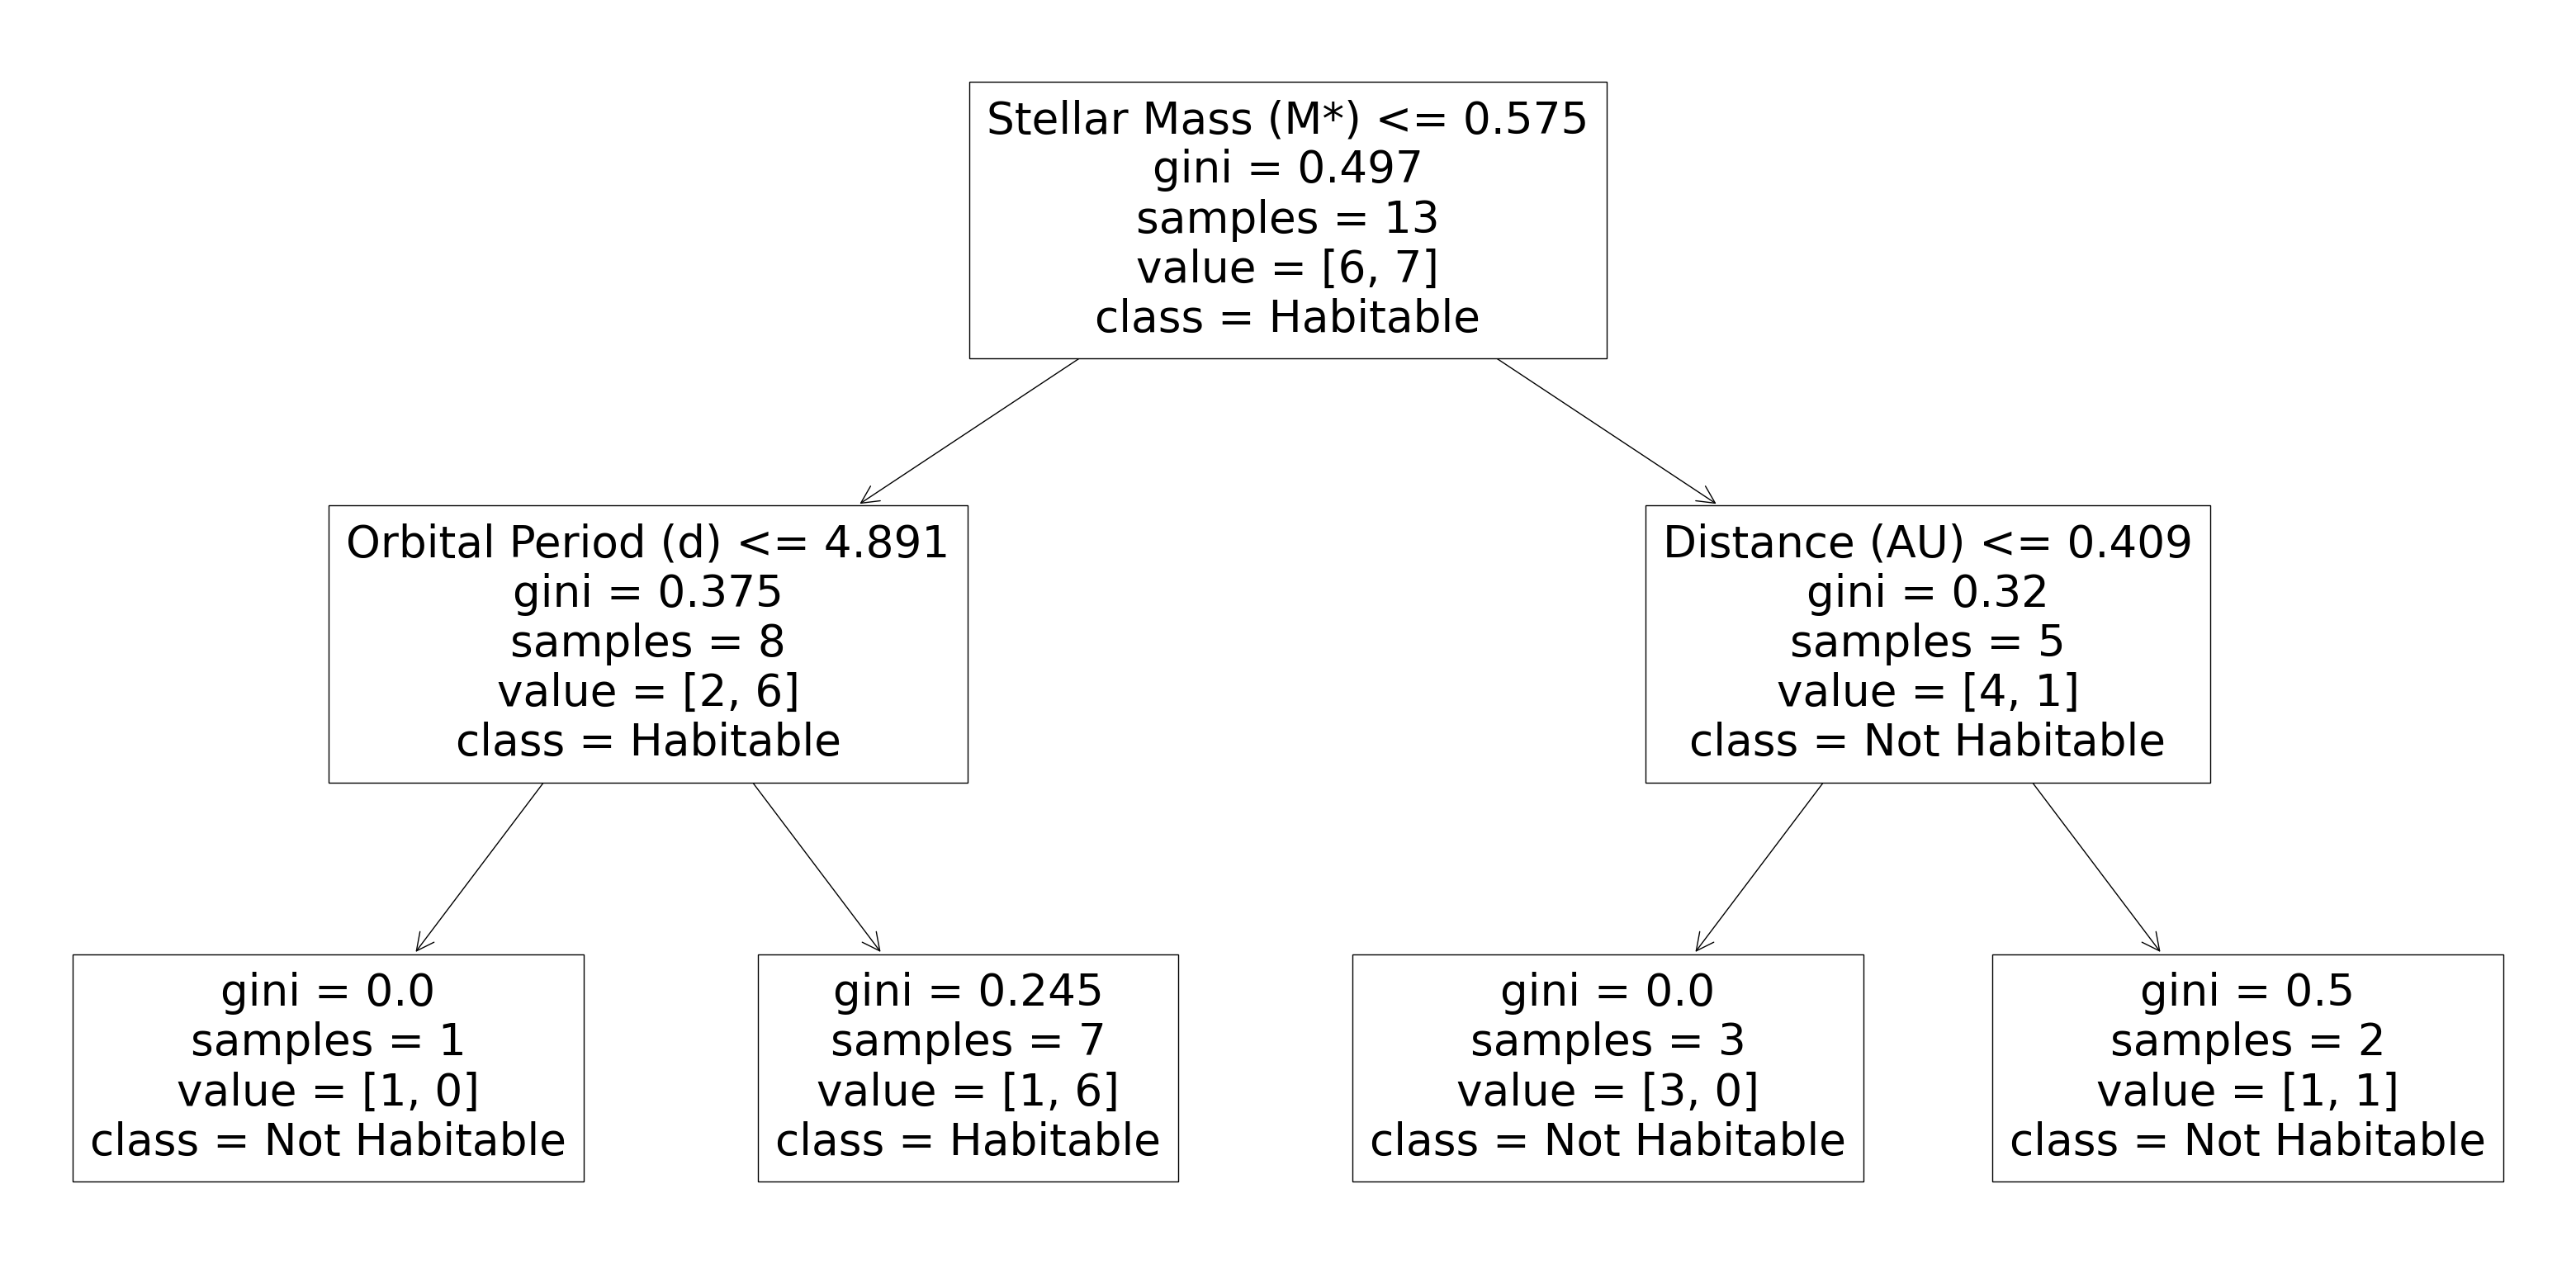

 4 of 5 are correctly predicted,  80.0 %


In [12]:
# --- define the model and some parameters
DT3_model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 2, random_state = 2024) #

# --- train the model
DT3_model.fit(X2_train, y2_train) 

# --- visualize decision tree
plt.figure (figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree (DT3_model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])
plt.show()

y3_pred = DT3_model.predict(X2_test)
y3_diff = np.absolute (y3_pred - y2_test)
n3_planets = y3_diff.size
n3_correct = n3_planets - np.count_nonzero (y3_diff)
print (f" {n3_correct} of {n3_planets} are correctly predicted, {n3_correct * 100.0 / n3_planets:5.1f} %")

## Algorithmus: k-Nächste Nachbarn (*k-Nearest Neighbour*, kNN)

## Binäre Klassifikation - Bewertung

## Zwischenschritt: Bei wenigen Daten Cross Validation (CV)

## Auswertung der Ergebnisse

## Was kann verbessert werden

## Ausblick: Multi Klassifikation

## Literatur

- [Acq23] Viviana Acquaviva; Machine Learning for Physisics and Astronomy; Princeton University Press; 2023
